In [36]:
# 2 - EDA

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read cleaned csv file
df = pd.read_csv("/Users/thomassimmons/c/td/data/dirty_cafe_sales_cleaned.csv")

In [38]:
# Start out with summary statistics
df.describe()

,Unnamed: 0,Quantity,Price Per Unit,Total Spent
count,3089.000000,3089.000000,3089.000000,3089.000000
mean,4975.863386,3.023632,2.954030,8.936711
std,2853.656081,1.418931,1.292975,6.032656
min,0.000000,1.000000,1.000000,1.000000
25%,2538.000000,2.000000,2.000000,4.000000
50%,4964.000000,3.000000,3.000000,8.000000
75%,7382.000000,4.000000,4.000000,12.000000
max,9999.000000,5.000000,5.000000,25.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        3089 non-null   int64  
 1   Transaction ID    3089 non-null   object 
 2   Item              3089 non-null   object 
 3   Quantity          3089 non-null   float64
 4   Price Per Unit    3089 non-null   float64
 5   Total Spent       3089 non-null   float64
 6   Payment Method    3089 non-null   object 
 7   Location          3089 non-null   object 
 8   Transaction Date  3089 non-null   object 
 9   Month             3089 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 241.5+ KB


In [40]:
df.isnull().sum()

Unnamed: 0          0
Transaction ID      0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
Month               0
dtype: int64

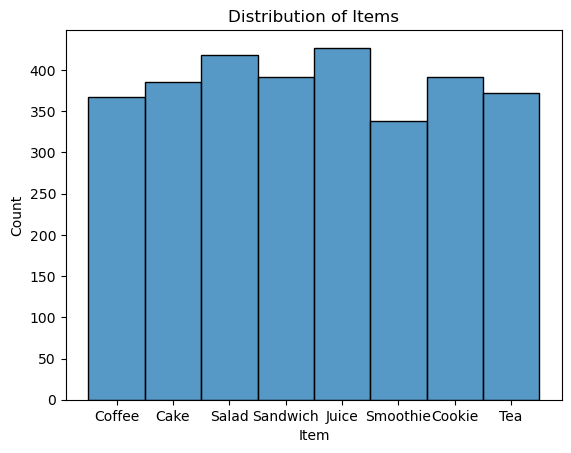

In [41]:
# Distributions of items
sns.histplot(df['Item'], kde=False)
plt.title("Distribution of Items")
plt.show()

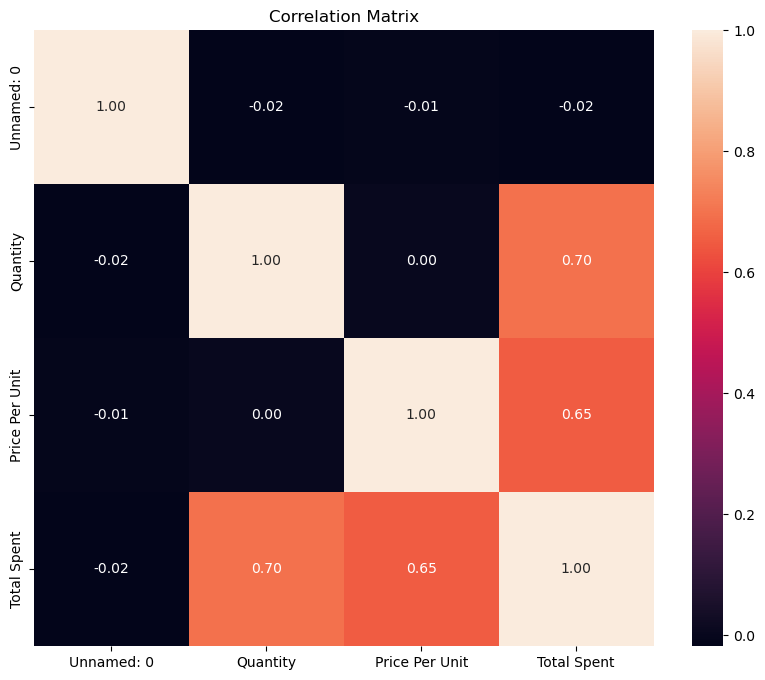

In [42]:
# Correlations
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

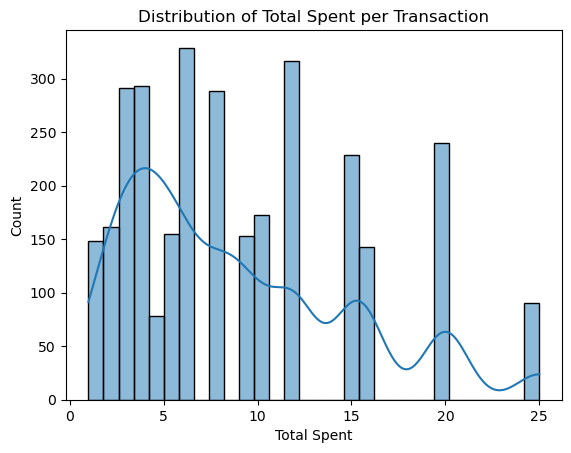

In [43]:
# Total spent distribution
sns.histplot(df['Total Spent'], bins=30, kde=True)
plt.title("Distribution of Total Spent per Transaction")
plt.show()

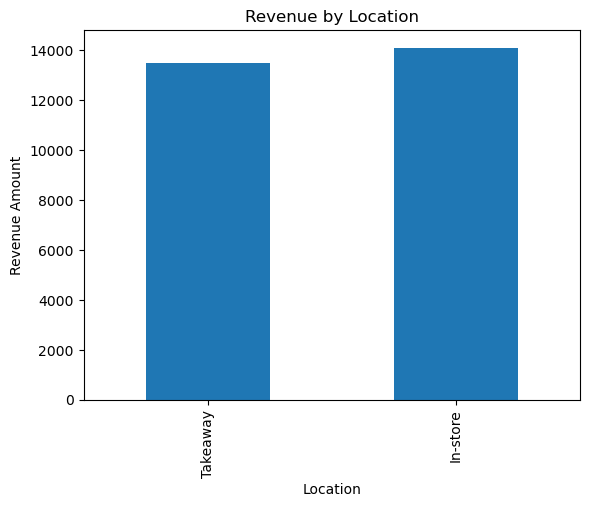

In [44]:
# Revenue by location
revenue_by_location = df.groupby('Location')['Total Spent'].sum().sort_values()
revenue_by_location.plot(kind='bar', title='Revenue by Location')
plt.ylabel("Revenue Amount")
plt.show()

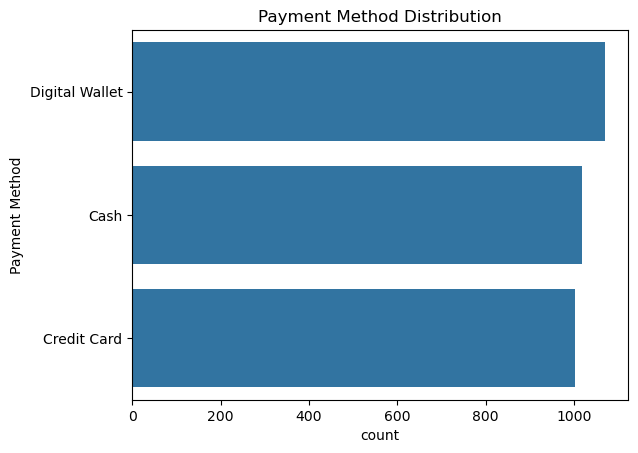

In [49]:
# Payment method distribution
sns.countplot(data=df, y='Payment Method', order=df['Payment Method'].value_counts().index)
plt.title("Payment Method Distribution")
plt.show()

In [63]:
# Converting since previous notebook 
df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

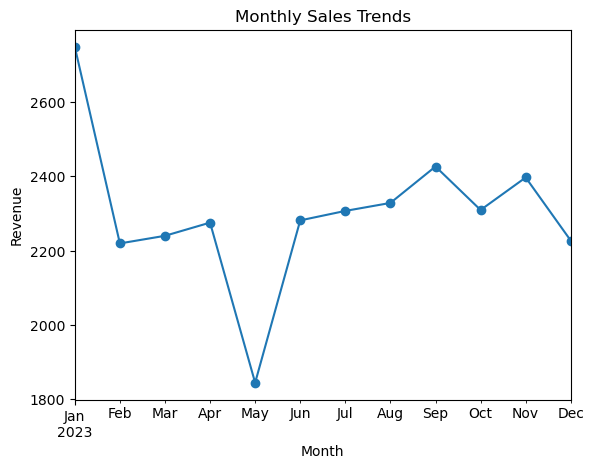

In [69]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['Total Spent'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title("Monthly Sales Trends")
plt.ylabel("Revenue")
plt.show()